In [1]:
import numpy as np
import scipy.stats as stats
import scipy.special as special
import pandas as pd
import chaospy as cp

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style("ticks")#'whitegrid')#
#sns.set_context("talk")
sns.set_style({'axes.linewidth':0.5,
               'xtick.direction': u'in',
               'xtick.major.size': 1.,
               'xtick.minor.size': 0.5,
               'ytick.direction': u'in',               
               'ytick.major.size': 1.,
               'ytick.minor.size': 0.5})  


:0: FutureWarning: IPython widgets are experimental and may change in the future.


# 6) Multivariate pdf: with couplas
## Only one output or quantity of interest (QoI)

OAKLEY & O'HAGAN (2004) FUNCTION

$y(\mathbf{x}) = \mathbf{a_1}^T + \mathbf{a_2}^T \sin(\mathbf{x}) + \mathbf{a_3}^T \cos(\mathbf{x}) + \mathbf{x}^T \mathbf{M} \mathbf{x}$

Dimensions: 15

Input Distributions PDF$(\mathbf{x})$:

The independent distributions of the input random variables are: xi ~ N(μ=0, σ=1), for all i = 1, …, 15. 


Description from https://www.sfu.ca/~ssurjano/oakoh04.html

This function's a-coefficients are chosen so that 5 of the input variables contribute significantly to the output variance, 5 have a much smaller effect, and the remaining 5 have almost no effect on the output variance. Values of the coefficient vectors a1, a2 and a3, and the matrix M, can be found at:
http://www.jeremy-oakley.staff.shef.ac.uk/psa_example.txt.

In [2]:
def y(x):
    
    if  x.shape[0] == 1: x = x.T
    
    a1 = np.array([0.0118, 0.0456, 0.2297, 0.0393, 0.1177, 0.3865, 0.3897, 0.6061, 0.6159, 0.4005, 1.0741, 1.1474, 0.7880, 1.1242, 1.1982]).T
    a2 = np.array([0.4341, 0.0887, 0.0512, 0.3233, 0.1489, 1.0360, 0.9892, 0.9672, 0.8977, 0.8083, 1.8426, 2.4712, 2.3946, 2.0045, 2.2621]).T
    a3 = np.array([0.1044, 0.2057, 0.0774, 0.2730, 0.1253, 0.7526, 0.8570, 1.0331, 0.8388, 0.7970, 2.2145, 2.0382, 2.4004, 2.0541, 1.9845]).T

    M = np.array([[-0.022482886,  -0.18501666,  0.13418263,   0.36867264,   0.17172785,   0.13651143,  -0.44034404, -0.081422854,   0.71321025,  -0.44361072,   0.50383394, -0.024101458, -0.045939684,   0.21666181,  0.055887417],
                [0.25659630,  0.053792287,  0.25800381,   0.23795905,  -0.59125756, -0.081627077,  -0.28749073,   0.41581639,   0.49752241,  0.083893165,  -0.11056683,  0.033222351,  -0.13979497, -0.031020556,  -0.22318721],
                [-0.055999811,   0.19542252, 0.095529005,  -0.28626530,  -0.14441303,   0.22369356,   0.14527412,   0.28998481,   0.23105010,  -0.31929879,  -0.29039128,  -0.20956898,   0.43139047,  0.024429152,  0.044904409],
                [0.66448103,   0.43069872,  0.29924645,  -0.16202441,  -0.31479544,  -0.39026802,   0.17679822,  0.057952663,   0.17230342,   0.13466011,  -0.35275240,   0.25146896, -0.018810529,   0.36482392,  -0.32504618],
                [-0.12127800,   0.12463327,  0.10656519,  0.046562296,  -0.21678617,   0.19492172, -0.065521126,  0.024404669, -0.096828860,   0.19366196,   0.33354757,   0.31295994, -0.083615456,  -0.25342082,   0.37325717],
                [-0.28376230,  -0.32820154, -0.10496068,  -0.22073452,  -0.13708154,  -0.14426375,  -0.11503319,   0.22424151, -0.030395022,  -0.51505615,  0.017254978,  0.038957118,   0.36069184,   0.30902452,  0.050030193],
                [-0.077875893, 0.0037456560,  0.88685604,  -0.26590028, -0.079325357, -0.042734919,  -0.18653782,  -0.35604718,  -0.17497421,  0.088699956,   0.40025886, -0.055979693,   0.13724479,   0.21485613, -0.011265799],
                [-0.092294730,   0.59209563, 0.031338285, -0.033080861,  -0.24308858, -0.099798547,  0.034460195,  0.095119813,  -0.33801620, 0.0063860024,  -0.61207299,  0.081325416,   0.88683114,   0.14254905,   0.14776204],
                [-0.13189434,   0.52878496,  0.12652391,  0.045113625,   0.58373514,   0.37291503,   0.11395325,  -0.29479222,  -0.57014085,   0.46291592, -0.094050179,   0.13959097,  -0.38607402,  -0.44897060,  -0.14602419],
                [0.058107658,  -0.32289338, 0.093139162,  0.072427234,  -0.56919401,   0.52554237,   0.23656926, -0.011782016,  0.071820601,  0.078277291,  -0.13355752,   0.22722721,   0.14369455,  -0.45198935,  -0.55574794],
                [0.66145875,   0.34633299,  0.14098019,   0.51882591,  -0.28019898,  -0.16032260, -0.068413337,  -0.20428242,  0.069672173,   0.23112577, -0.044368579,  -0.16455425,   0.21620977, 0.0042702105, -0.087399014],
                [0.31599556, -0.027551859,  0.13434254,   0.13497371,  0.054005680,  -0.17374789,   0.17525393,  0.060258929,  -0.17914162,  -0.31056619,  -0.25358691,  0.025847535,  -0.43006001,  -0.62266361, -0.033996882],
                [-0.29038151,  0.034101270, 0.034903413,  -0.12121764,  0.026030714,  -0.33546274,  -0.41424111,  0.053248380,  -0.27099455, -0.026251302,   0.41024137,   0.26636349,   0.15582891,  -0.18666254,  0.019895831],
                [-0.24388652,  -0.44098852, 0.012618825,   0.24945112,  0.071101888,   0.24623792,   0.17484502, 0.0085286769,   0.25147070,  -0.14659862, -0.084625150,   0.36931333,  -0.29955293,   0.11044360,  -0.75690139],
                [0.041494323,  -0.25980564,  0.46402128,  -0.36112127,  -0.94980789,  -0.16504063, 0.0030943325,  0.052792942,   0.22523648,   0.38390366,   0.45562427,  -0.18631744, 0.0082333995,   0.16670803,   0.16045688]])
    
    return np.dot(a1.T, x) + np.dot(a2.T, np.sin(x)) + np.dot(a3.T, np.cos(x)) + np.dot(x.T,np.dot(M, x)) 

Generate a random covariance matrix by generating a symmetric positive definite matrix

In [3]:
np.random.seed(0)
C = np.random.randn(15,15)
C = 0.5*(C+C.T)
C = np.dot(C,C.T)

In [4]:
dist_Q = cp.MvNormal(np.zeros(15),C)#cp.Iid(cp.Normal(),15)
dist_R = cp.Iid(cp.Uniform(),15)

### a) MC with Halton sampling

In [5]:
sample_inputs = dist_Q.sample(size=50000,rule='H')
sample_u = np.array([y(node) for node in sample_inputs.T])

E_u = np.mean(sample_u,axis=0)
Std_u = np.std(sample_u,axis=0)
Q05_u = np.percentile(sample_u,5,axis=0)
Q95_u = np.percentile(sample_u,95,axis=0)

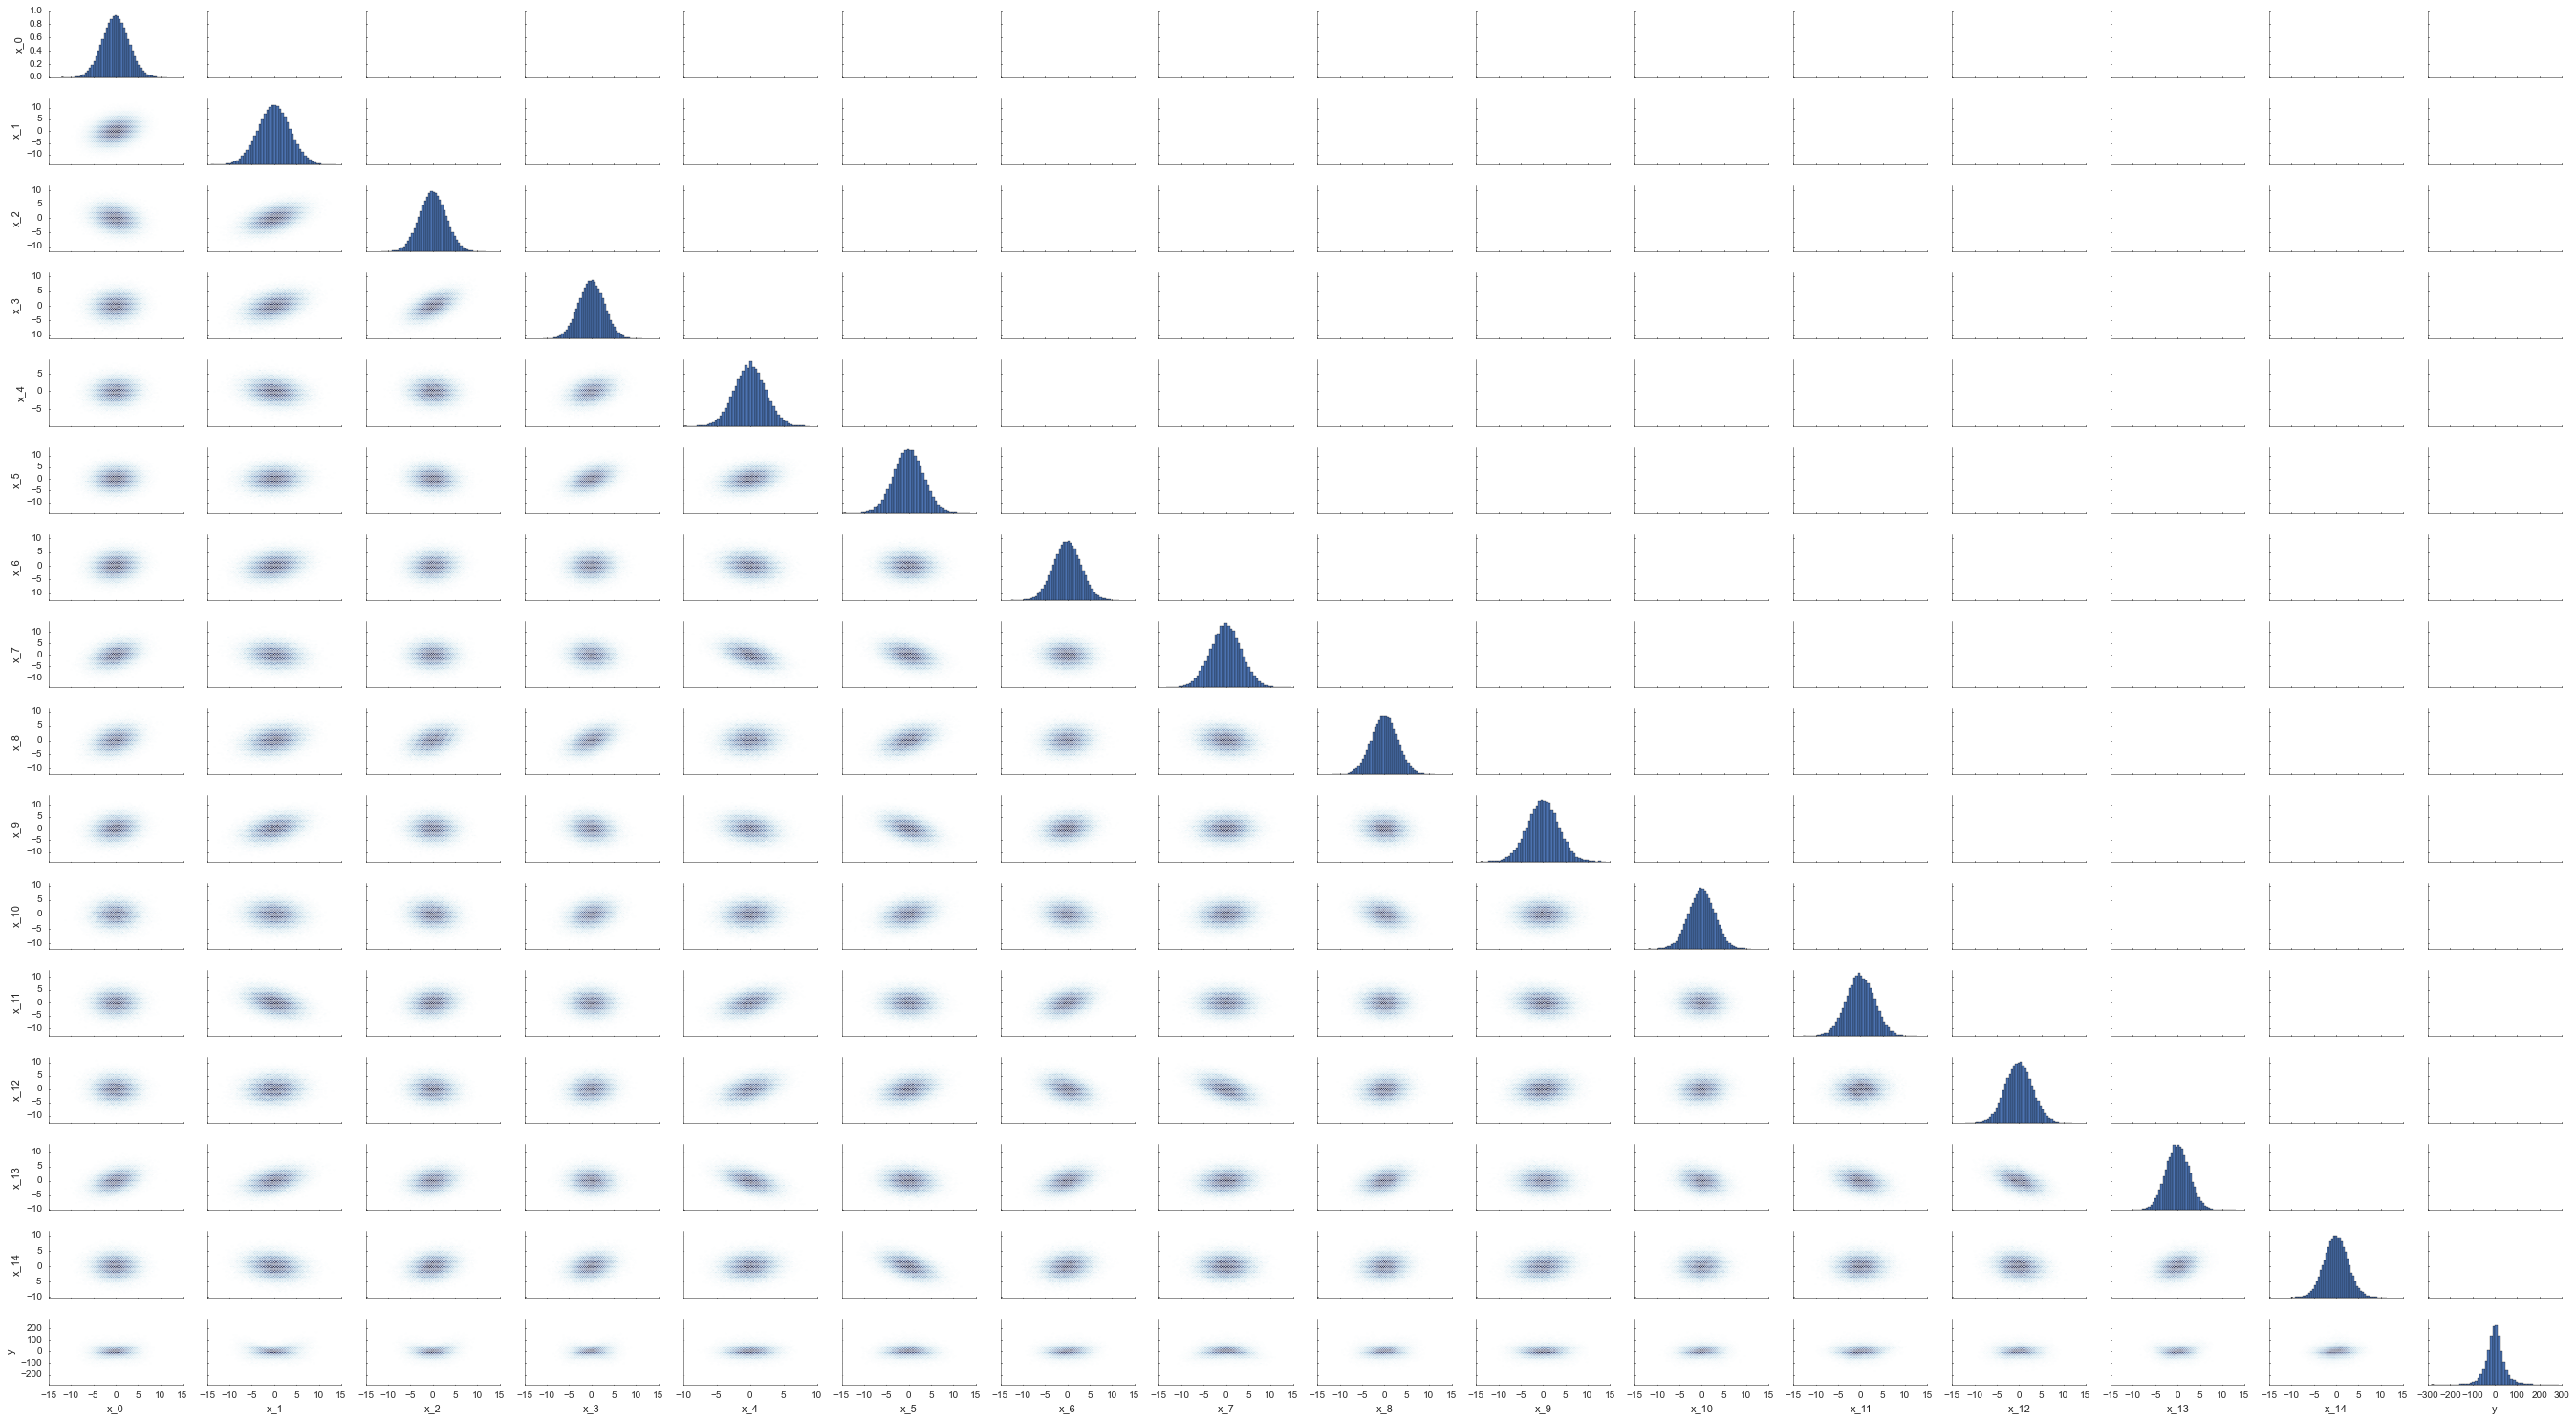

In [6]:
g=sns.PairGrid(pd.DataFrame(columns=['x_'+str(i) for i in range(15)]+['y'],data=np.vstack([sample_inputs,sample_u]).T),
               size=1.3,aspect=1.8,diag_sharey=False)
#g.map_lower(plt.scatter,alpha=0.2)
g.map_lower(plt.hexbin, gridsize=50, color='white', cmap=sns.cubehelix_palette(light=1,rot=-.15, as_cmap=True))
g.map_diag(plt.hist,bins=50) 
g.savefig('Figures/9b_Oakley_MC_sample.pdf')

### b) PCE with Point collocation

In [7]:
M = 3    # Order of the polynomial
N = M + 1 # Number of terms

P = cp.orth_ttr(M,dist_R)

In [8]:
# Fixed number of model evaluations and Hammersley sequence sampling
#nodes_R = dist_R.sample(100,rule='M')

# Exponenial rule and Hammersley sequence sampling
nodes_R = dist_R.sample(3.*special.comb(M+15,15),rule='H')

print 'nodes', len(nodes_R[0,:])

nodes_Q = dist_Q.inv(dist_R.fwd(nodes_R))
sample_u_pc = np.array([y(node) for node in nodes_Q.T])

nodes 2448


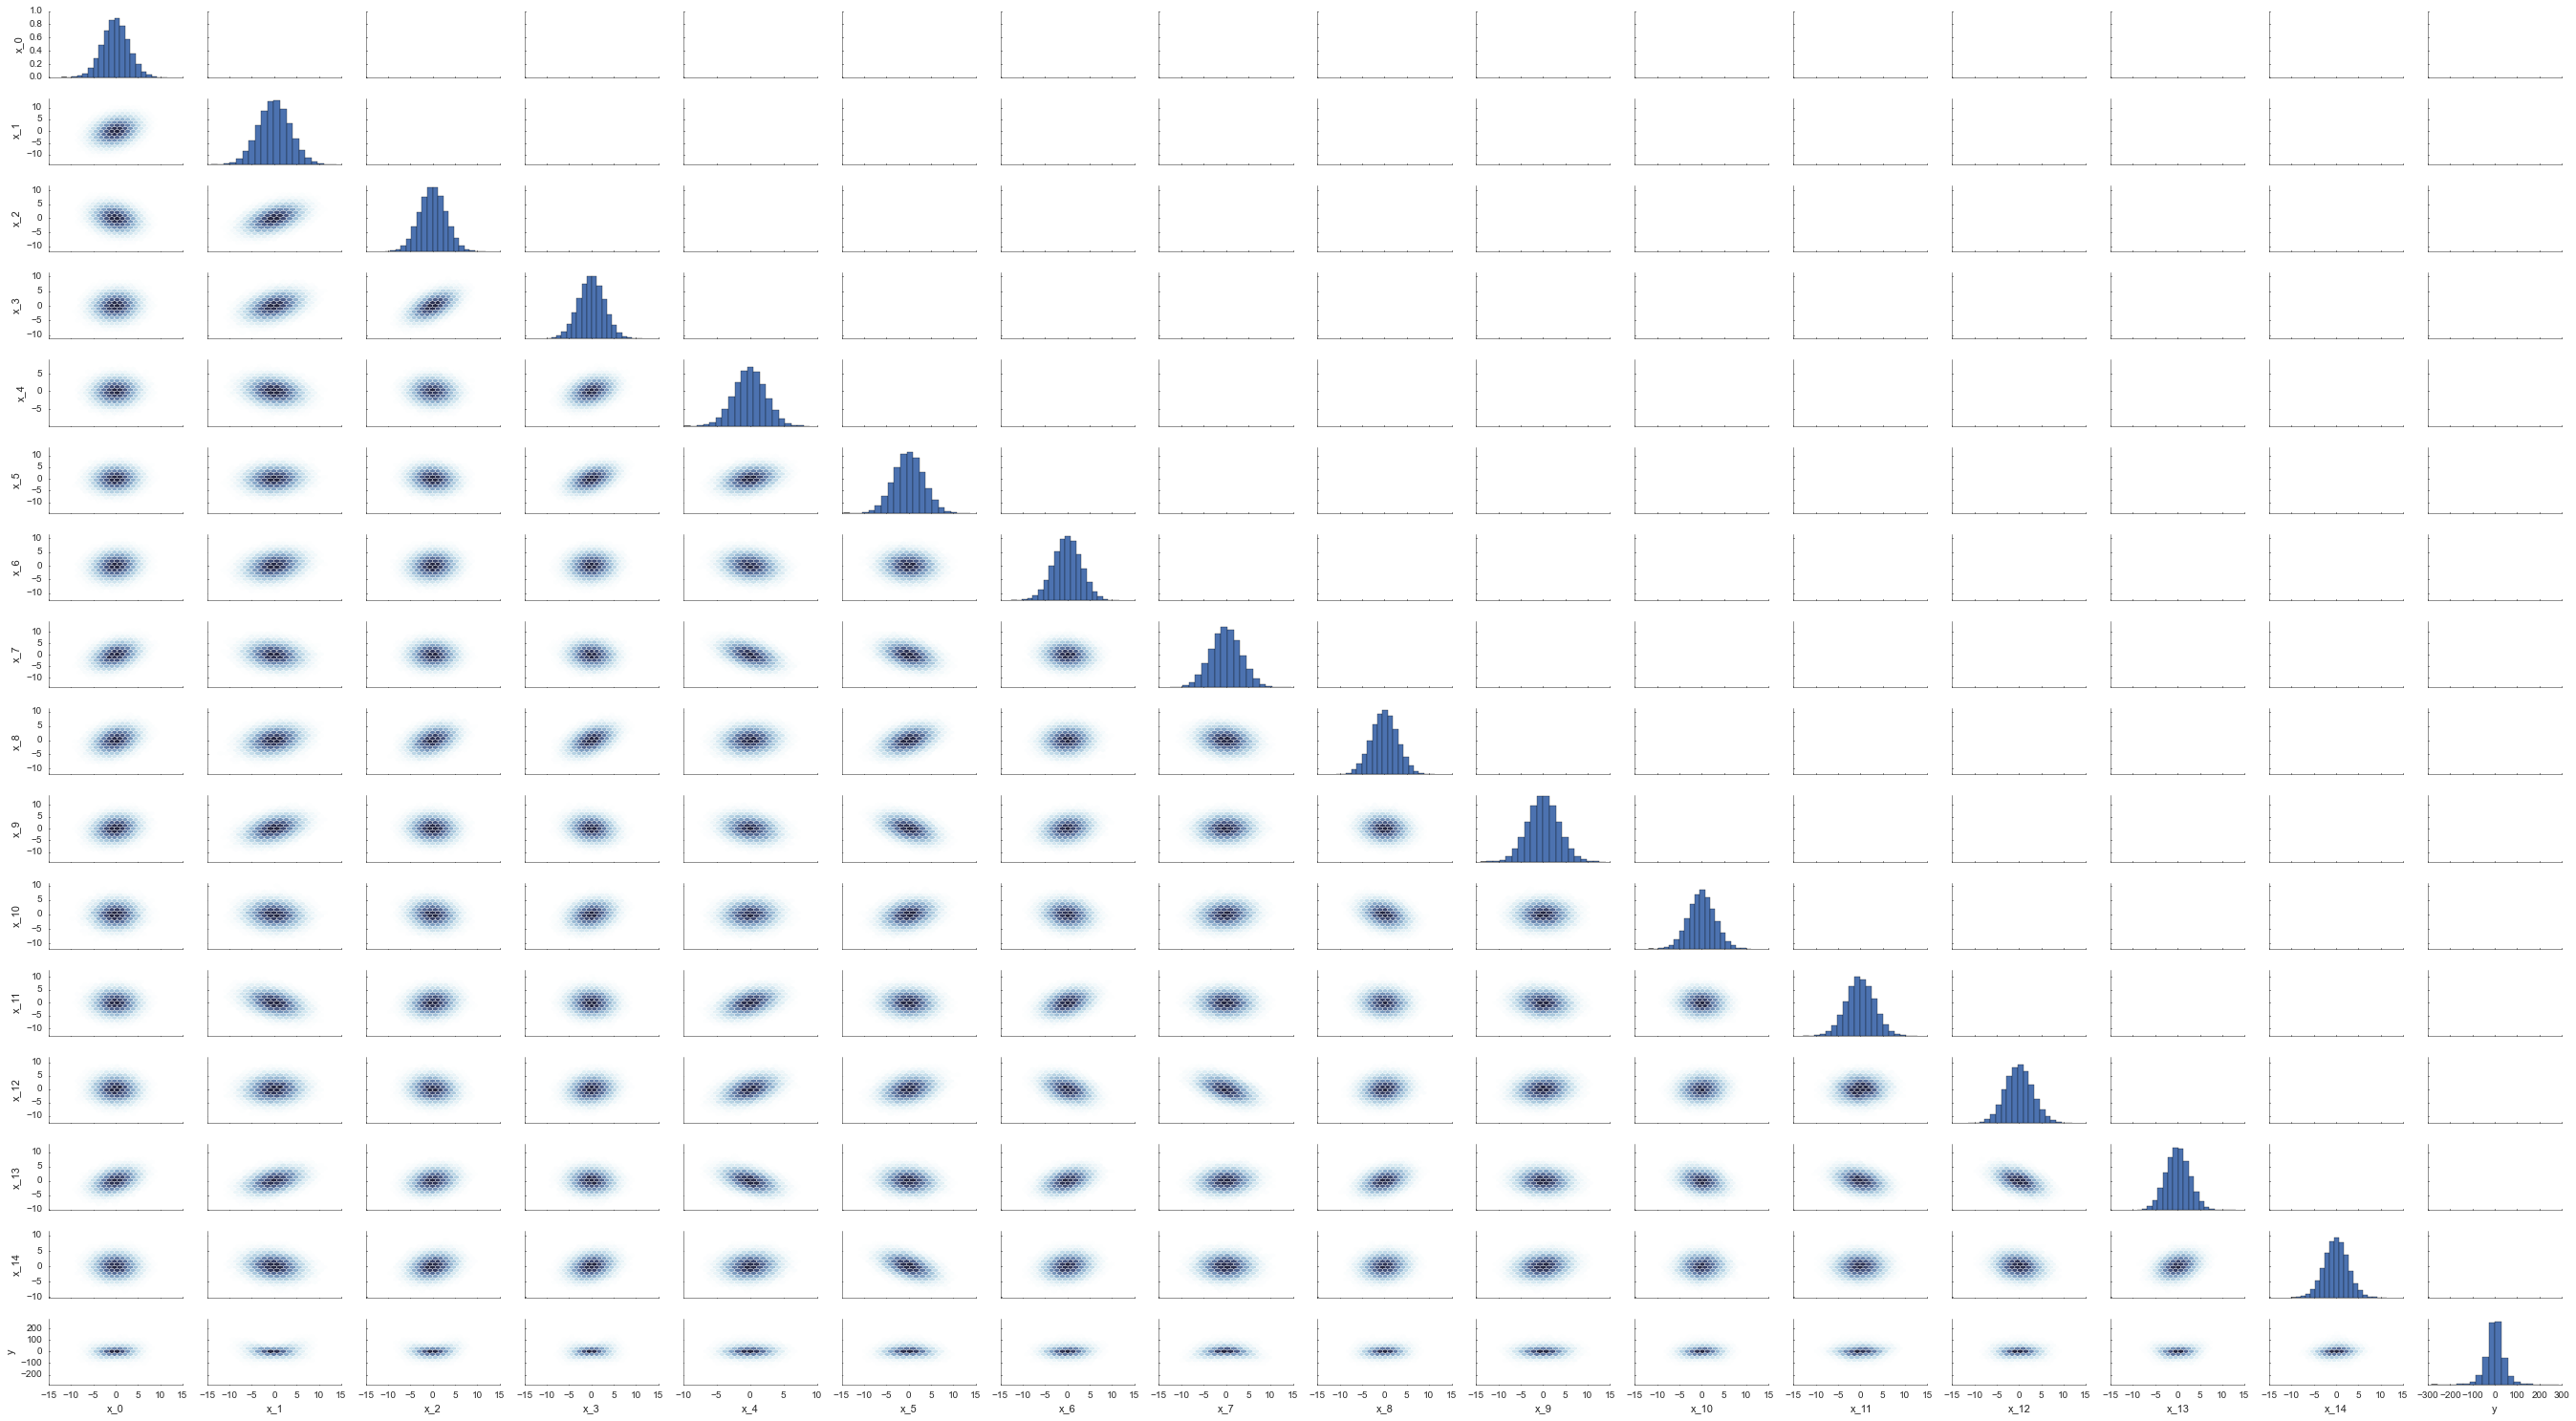

In [9]:
g=sns.PairGrid(pd.DataFrame(columns=['x_'+str(i) for i in range(15)]+['y'],data=np.vstack([sample_inputs,sample_u]).T),
               size=1.3,aspect=1.8,diag_sharey=False)
#g.map_lower(plt.scatter,alpha=0.2)
g.map_lower(plt.hexbin, gridsize=20, color='white', cmap=sns.cubehelix_palette(light=1,rot=-.15, as_cmap=True))
g.map_diag(plt.hist,bins=20) 
g.savefig('Figures/9b_Oakley_train.pdf')

In [10]:
# Point collocation
u_hat = cp.fit_regression(P, nodes_R, sample_u_pc, 
                          #rule='LA',n_nonzero_coefs=20) #Lars (Least Angle Regression). n_nonzero_coefs= all dimensions
                          #rule='LAS',alpha=1e-4,max_iter=200) #Lasso (Least Absolute Shrinkage and Selection Operator) 
                          rule='LL', alpha=1e-4,max_iter=200) #Lasso and Lars model
                          #rule='OMP',n_nonzero_coefs=M+1, tol=1e2) # Orthogonal Matching Pursuit. n_nonzero_coefs=1D
                          # -----------
                          # NOT sparse
                          # -----------
                          #rule='BARD')

# Statistics based on the PCE coefficients
mean_u_pc, std_u_pc = cp.E(u_hat, dist_R), cp.Std(u_hat, dist_R)

print len(u_hat.expons())
for i in range(len(u_hat.expons())):
    print u_hat.expons()[i]#, u_hat.coeffs()[i]



209
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [11]:
# Repeat the MC sample ussing the surrogate model
sample_R_inputs = dist_R.sample(size=50000,rule='H')
sample_Q_inputs = dist_Q.inv(dist_R.fwd(sample_R_inputs))
sample_u_hat = np.array([u_hat(*in_vars) for in_vars in sample_R_inputs.T ])

E_u_hat = np.mean(sample_u_hat,axis=0)
Std_u_hat = np.std(sample_u_hat,axis=0)
Q05_u_hat = np.percentile(sample_u_hat,5,axis=0)
Q95_u_hat = np.percentile(sample_u_hat,95,axis=0)

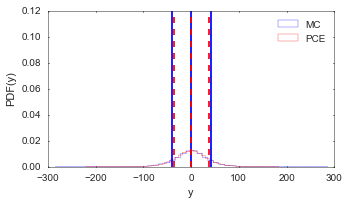

In [12]:
fig = plt.figure(figsize=[5,3])
ax = fig.add_subplot(111)
ax.hist(sample_u,
         bins=50,
         histtype='step',
         color='blue',
         normed=True,
         cumulative=False,
         label='MC'
        )
ax.vlines([E_u,E_u-Std_u,E_u+Std_u],0,0.12,'blue')
#plt.vlines([Q05_u,Q95_u],0,0.12,'lightblue')

plt.hist(sample_u_hat,
         bins=50,
         histtype='step',
         color='red',
         normed=True,
         cumulative=False,
         label='PCE'
        )
plt.vlines([mean_u_pc,mean_u_pc-std_u_pc,mean_u_pc+std_u_pc],0,0.12,'red','--')
#plt.vlines([Q05_u_hat,Q95_u_hat],0,0.12,'pink')

ax.set_xlabel('y')
ax.set_ylabel('PDF(y)')
ax.legend(loc='upper right')
fig.tight_layout()
fig.savefig('Figures/9b_Oakley_PCE_y.pdf')
print

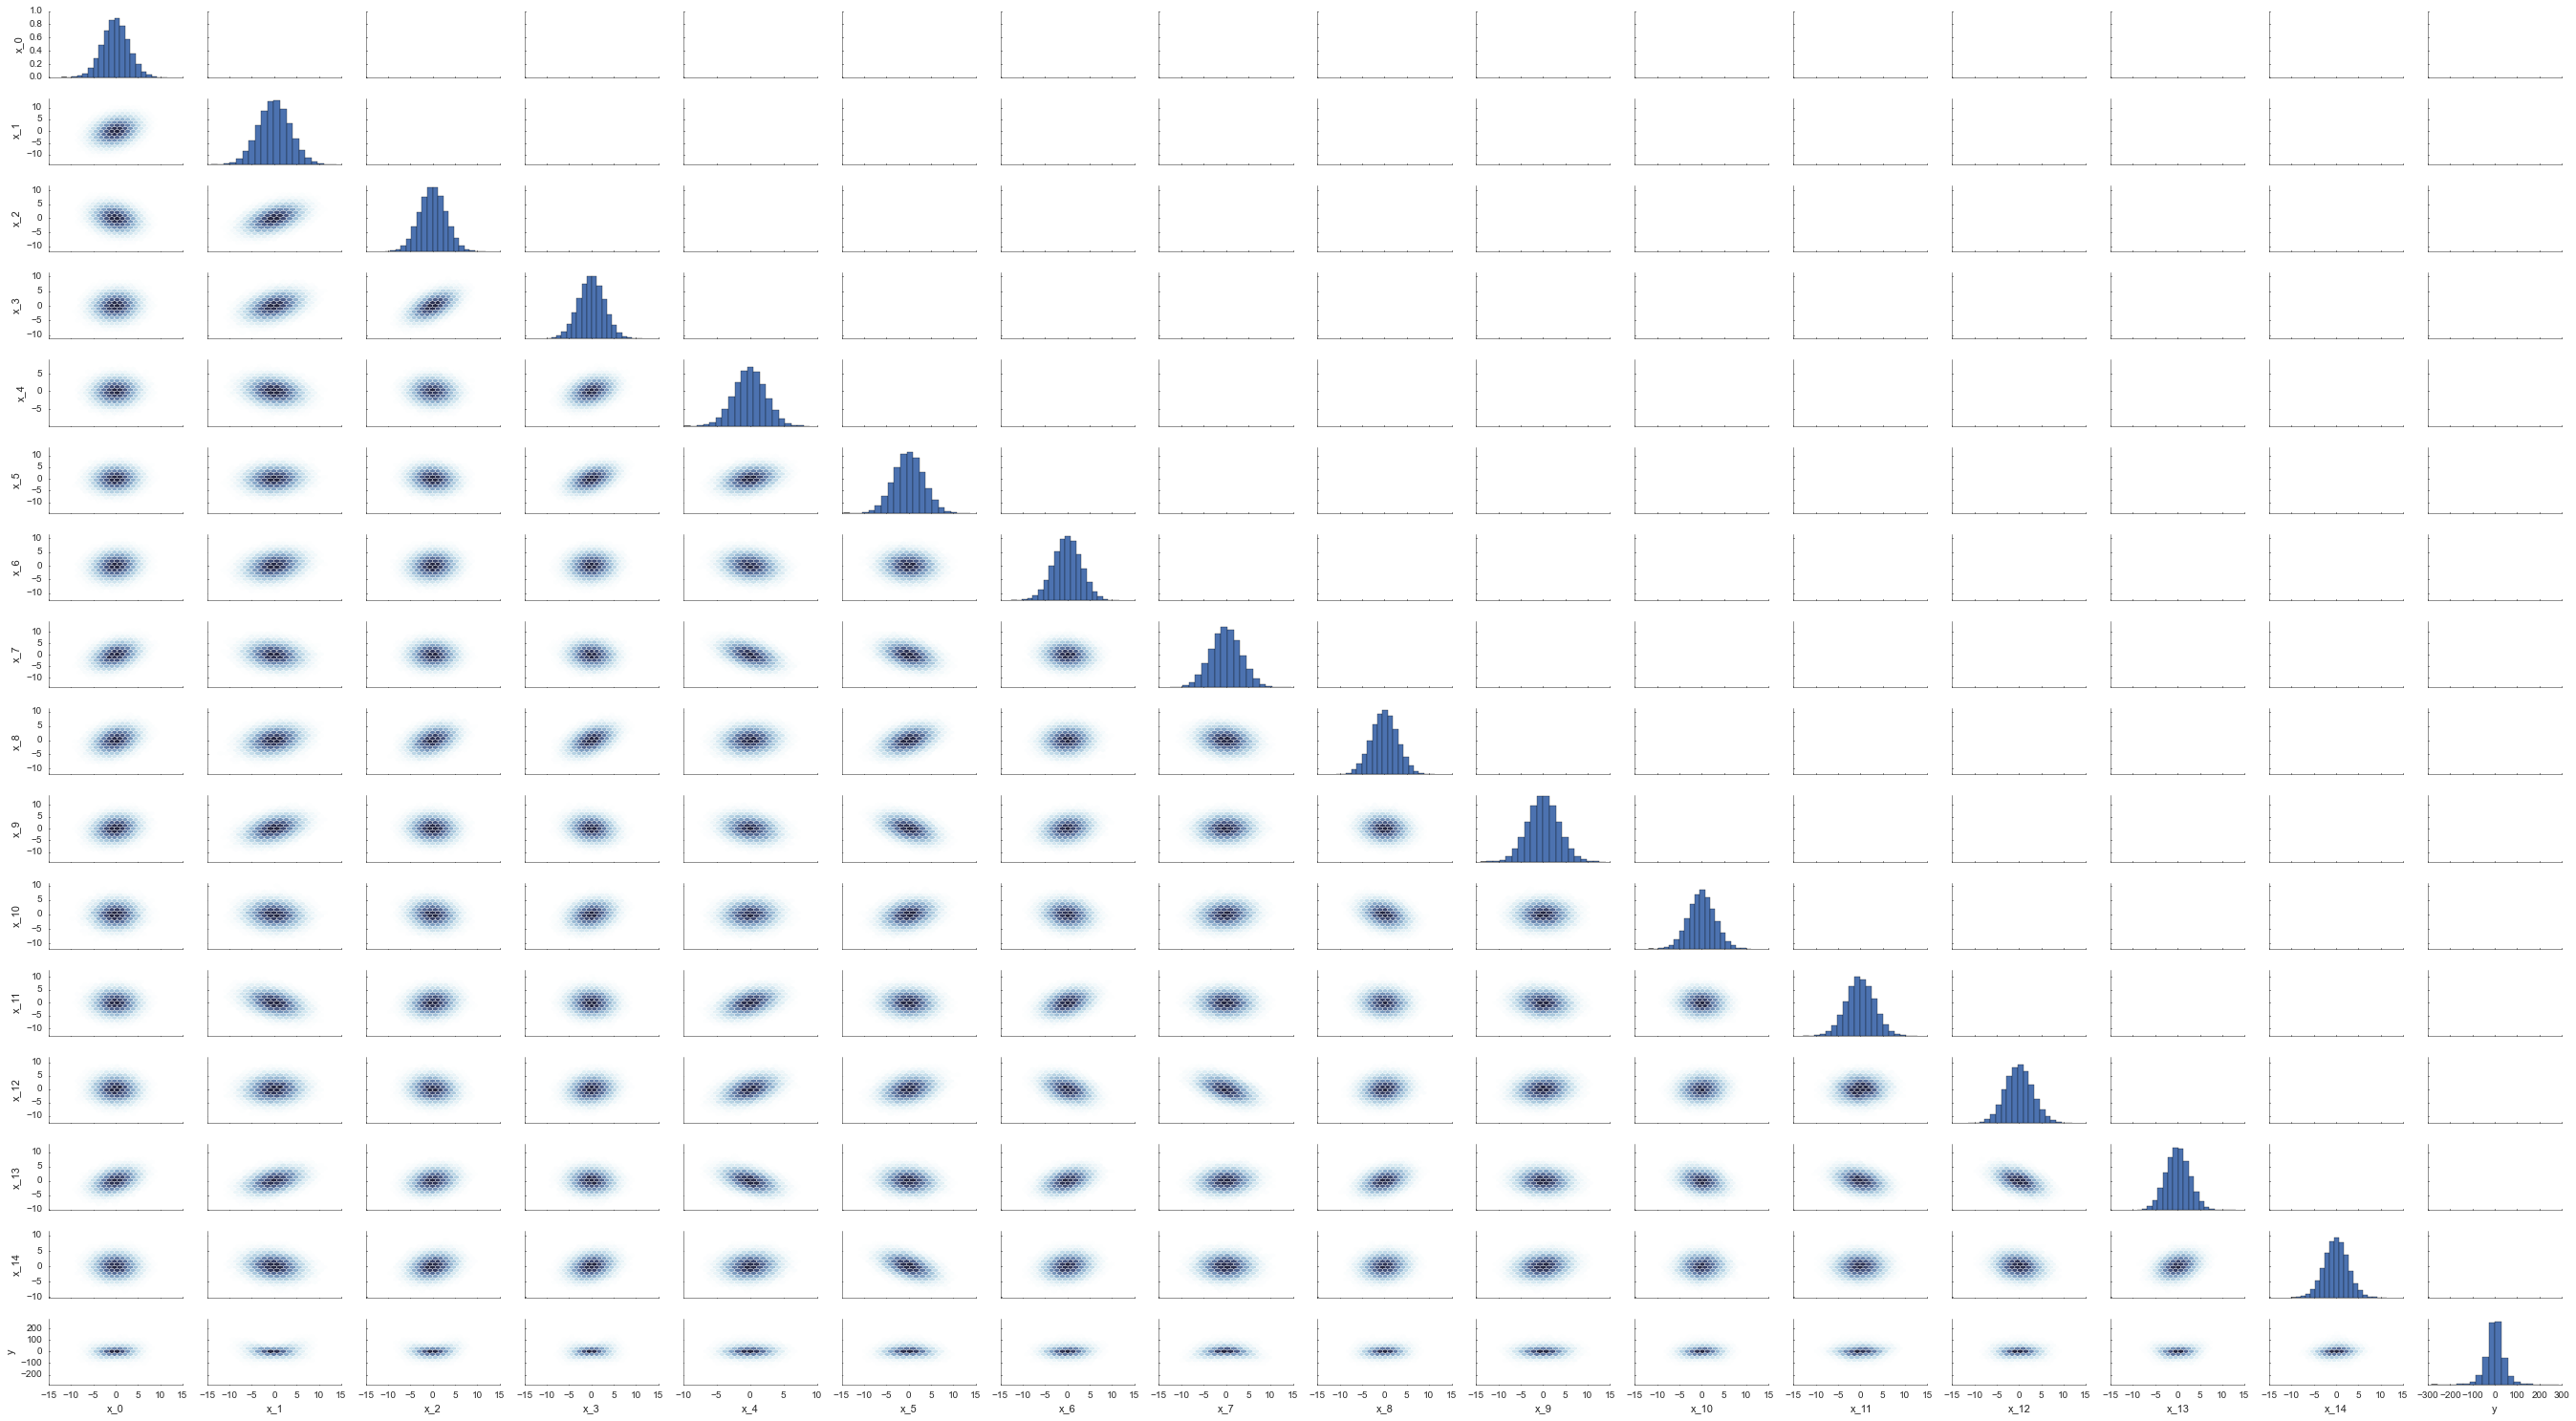

In [13]:
g=sns.PairGrid(pd.DataFrame(columns=['x_'+str(i) for i in range(15)]+['y'],data=np.vstack([sample_inputs,sample_u]).T),
               size=1.3,aspect=1.8,diag_sharey=False)
#g.map_lower(plt.scatter,alpha=0.2)
g.map_lower(plt.hexbin, gridsize=20, color='white', cmap=sns.cubehelix_palette(light=1,rot=-.15, as_cmap=True))
g.map_diag(plt.hist,bins=20) 
g.savefig('Figures/9b_Oakley_PCE_sample.pdf')

In [ ]:
cp.Sens_t(u_hat, dist_R)